#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from nltk.corpus import stopwords
import string

import sqlite3

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

from warnings import filterwarnings
filterwarnings('ignore')

#### READING THE DATA

In [2]:
df=pd.read_csv("F:\\DS,Courses\\Datasets\\Tweets.csv")

#### EXPLORING THE DATA

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


#### FINDING THE NUMBER OF NULL VALUES IN EACH COLUMN

In [6]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

#### DEFINING CATEGORICAL DATA

In [8]:
categ=['airline_sentiment','negativereason','airline']

#### LENGTH OF TEXT

In [9]:
df['Length_Of_text']=df.text.apply(lambda x : len(x))

#### DATA VISUALIZATION

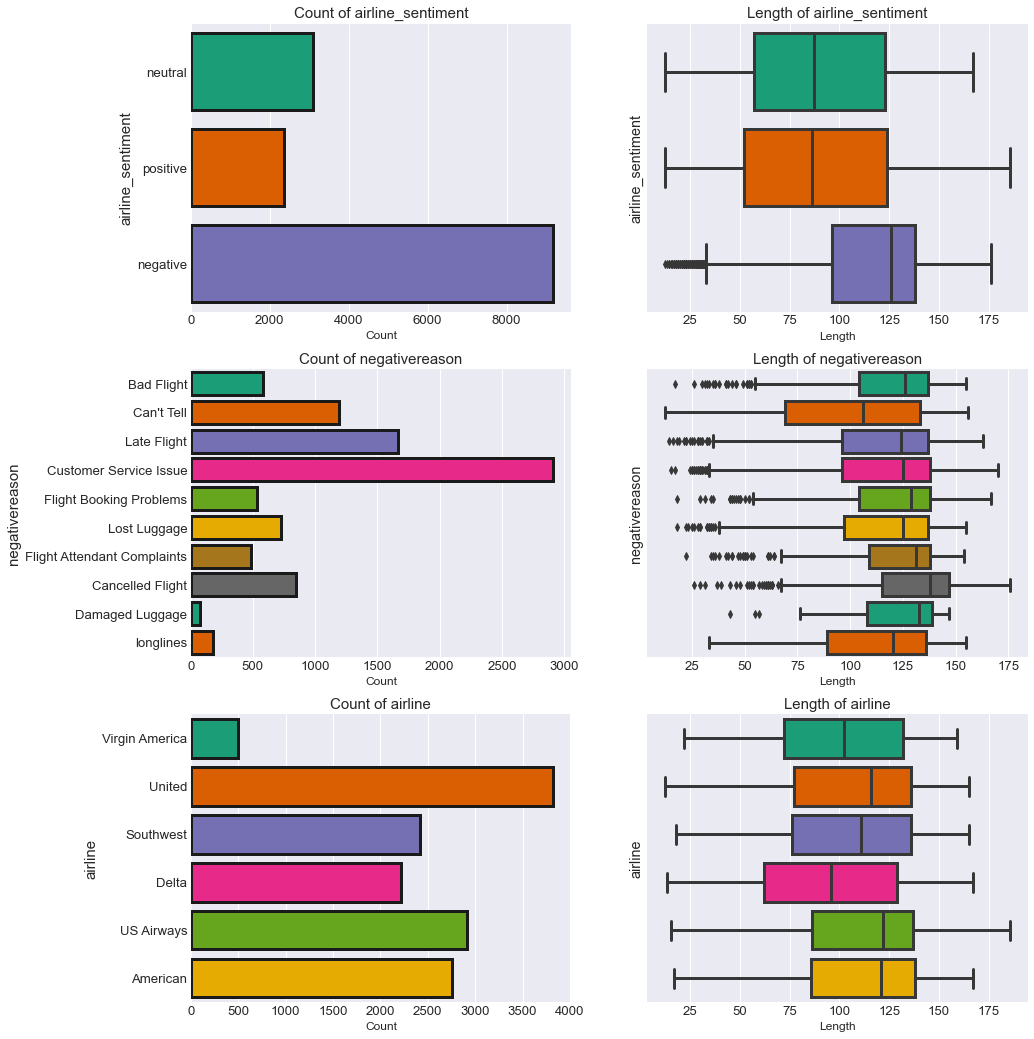

In [10]:
sb.set(font_scale=1.2)
plt.figure(figsize=(15,18))
plt.style.use('seaborn-darkgrid')
for var,num in zip(categ,range(1,len(categ)*2+1,2)):
    plt.subplot(len(categ),2,num)
    sb.countplot(y=df[var],palette='Dark2',edgecolor='k',saturation=5,linewidth=3)
    plt.ylabel(var,fontsize=15)
    plt.xlabel('Count',fontsize=12)
    plt.title(f"Count of {var}",fontsize=15)
    
    plt.subplot(len(categ),2,num+1)
    sb.boxplot(y=df[var],x=df.Length_Of_text,saturation=5,linewidth=3,palette='Dark2')
    plt.yticks([])
    plt.xlabel('Length',fontsize=12)
    plt.title(f"Length of {var}",fontsize=15)

#### COUNT OF NEGATIVE REASONS

<AxesSubplot:xlabel='negativereason', ylabel='count'>

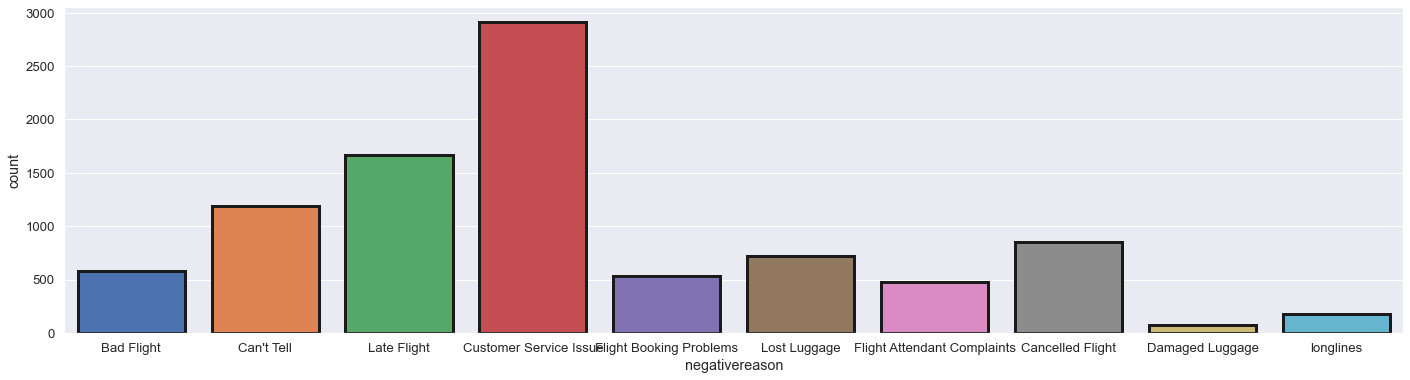

In [11]:
sb.set(font_scale=1.2)
plt.figure(figsize=(24,6))
sb.countplot(df.negativereason,edgecolor='k',saturation=5,linewidth=3)

#### HEATMAP

<AxesSubplot:>

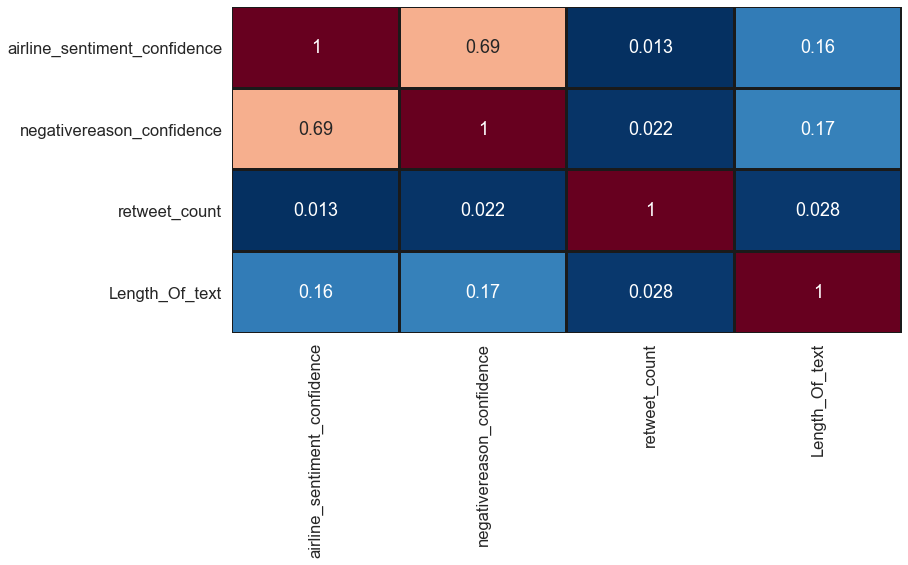

In [12]:
sb.set(font_scale=1.5)
plt.figure(figsize=(12,6))
sb.heatmap(df.iloc[:,1:].corr(),annot=True,cmap='RdBu_r',cbar=False,linewidths=2,linecolor='k')

#### PAIRPLOT OF DIFFERENT AIRLINE SENTIMENTS

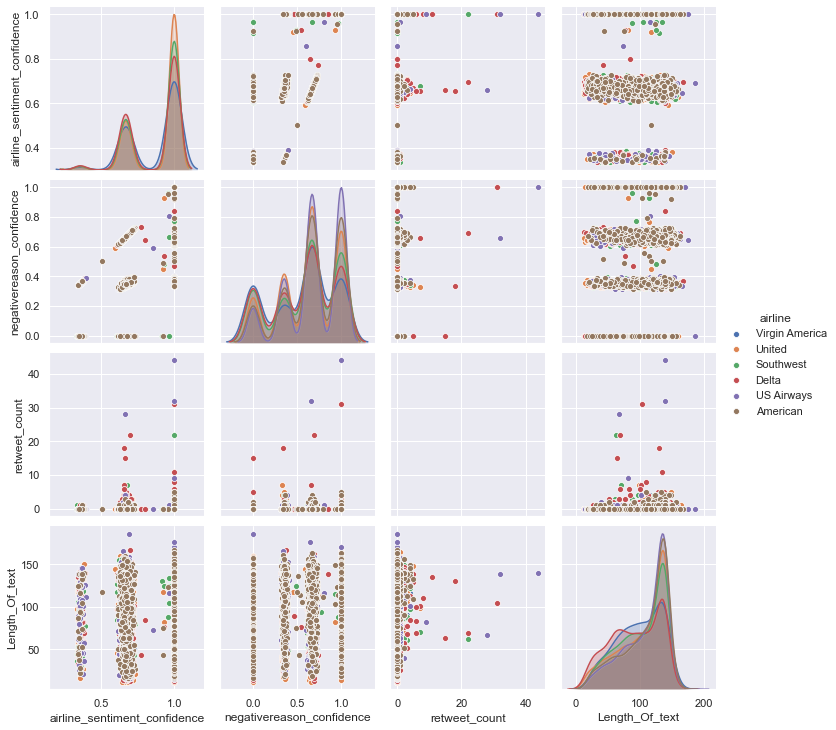

In [13]:
sb.set(font_scale=1)
sb.pairplot(df.iloc[:,1:],hue='airline')

#### DEFINING THE TEXT ANALYSER

In [14]:
def text_analyser(text):
    new_text=[c for c in text if c not in string.punctuation]
    new_text=''.join(new_text)
    new_text=[word for word in new_text.split()[1:] if word.lower() not in stopwords.words('english')]
    return new_text

#### READING THE TEST DATABASE

In [15]:
con=sqlite3.connect("F:\\DS,Courses\\Datasets\\database.sqlite")
tweet=pd.read_sql_query("SELECT * FROM tweets",con)

#### TRANSFORMING TRAINING DATA INTO SPARSE MATRIX

In [16]:
cv=CountVectorizer(analyzer=text_analyser).fit(df.text).transform(df.text)
tf=TfidfTransformer().fit(cv).transform(cv)

#### TRANSFORMING TESTING DATA INTO SPARSE MATRIX

In [17]:
cv_t=CountVectorizer(analyzer=text_analyser).fit(tweet.text).transform(tweet.text)
tf_t=TfidfTransformer().fit(cv_t).transform(cv_t)

#### INITIALISING THE MODELS

In [18]:
log=LogisticRegression()
mul=MultinomialNB()
tree=DecisionTreeClassifier()
ex_tree=ExtraTreeClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()

#### CREATING A MODELS ARRAY FOR TESTING

In [19]:
models=[log,mul,tree,ex_tree,svc,rfc,abc,gb]
names=[x.__class__.__name__ for x in models]

#### MODEL FITTING AND PREDICTING

In [20]:
predictions=[]

for m in models:
    m.fit(tf,df.airline_sentiment)
    predictions.append(m.predict(tf_t))

#### CREATING A PREDICTIONS DATAFRAME

In [21]:
predictions_new=pd.DataFrame({i:j for i,j in zip(names,predictions)})

#### DISPLAYING THE CLASSIFICATION METRICS

In [22]:
Accuracy=[]
Precision=[]
Recall=[]
F1=[]
for var in predictions_new.columns:
    print(f"\n Classification Report for {var}: \n",classification_report(tweet.airline_sentiment,predictions_new[var]))
    print(f"\n Confusion Matrix for {var}: \n",confusion_matrix(tweet.airline_sentiment,predictions_new[var]))
    print(f"\n Accuracy Score for {var}: \n",accuracy_score(tweet.airline_sentiment,predictions_new[var]))
    print('='*100)
    Accuracy.append(accuracy_score(tweet.airline_sentiment,predictions_new[var]))
    Precision.append(precision_score(tweet.airline_sentiment,predictions_new[var],average='macro'))
    Recall.append(recall_score(tweet.airline_sentiment,predictions_new[var],average='macro'))
    F1.append(f1_score(tweet.airline_sentiment,predictions_new[var],average='macro'))


 Classification Report for LogisticRegression: 
               precision    recall  f1-score   support

    negative       0.87      0.98      0.92      9082
     neutral       0.89      0.70      0.79      3069
    positive       0.92      0.74      0.82      2334

    accuracy                           0.88     14485
   macro avg       0.90      0.81      0.84     14485
weighted avg       0.89      0.88      0.88     14485


 Confusion Matrix for LogisticRegression: 
 [[8922  112   48]
 [ 823 2154   92]
 [ 471  144 1719]]

 Accuracy Score for LogisticRegression: 
 0.8833275802554367

 Classification Report for MultinomialNB: 
               precision    recall  f1-score   support

    negative       0.71      1.00      0.83      9082
     neutral       0.92      0.28      0.43      3069
    positive       0.95      0.34      0.50      2334

    accuracy                           0.74     14485
   macro avg       0.86      0.54      0.59     14485
weighted avg       0.80      0.74   

#### CREATING A SCORES MATRIX AND DISPLAYING IT

In [23]:
scores=pd.DataFrame({'Accuracy':Accuracy,'Precision':Precision,'Recall':Recall,'F1':F1},index=names)
print(scores)

                            Accuracy  Precision    Recall        F1
LogisticRegression          0.883328   0.897268  0.806915  0.843623
MultinomialNB               0.739040   0.861990  0.538040  0.585841
DecisionTreeClassifier      0.993718   0.991285  0.990521  0.990898
ExtraTreeClassifier         0.994822   0.992305  0.992283  0.992290
SVC                         0.964929   0.969739  0.941427  0.954696
RandomForestClassifier      0.995996   0.993267  0.993835  0.993546
AdaBoostClassifier          0.708112   0.690296  0.534086  0.532011
GradientBoostingClassifier  0.724543   0.793568  0.539821  0.560302


#### DICTIONARY FOR CONFUSION MATRICES

In [24]:
con_mat={n:(confusion_matrix(tweet.airline_sentiment,predictions_new[n])) for n in names}

#### VISUALIZING THE CONFUSION MATRICES THROUGH HEATMAP

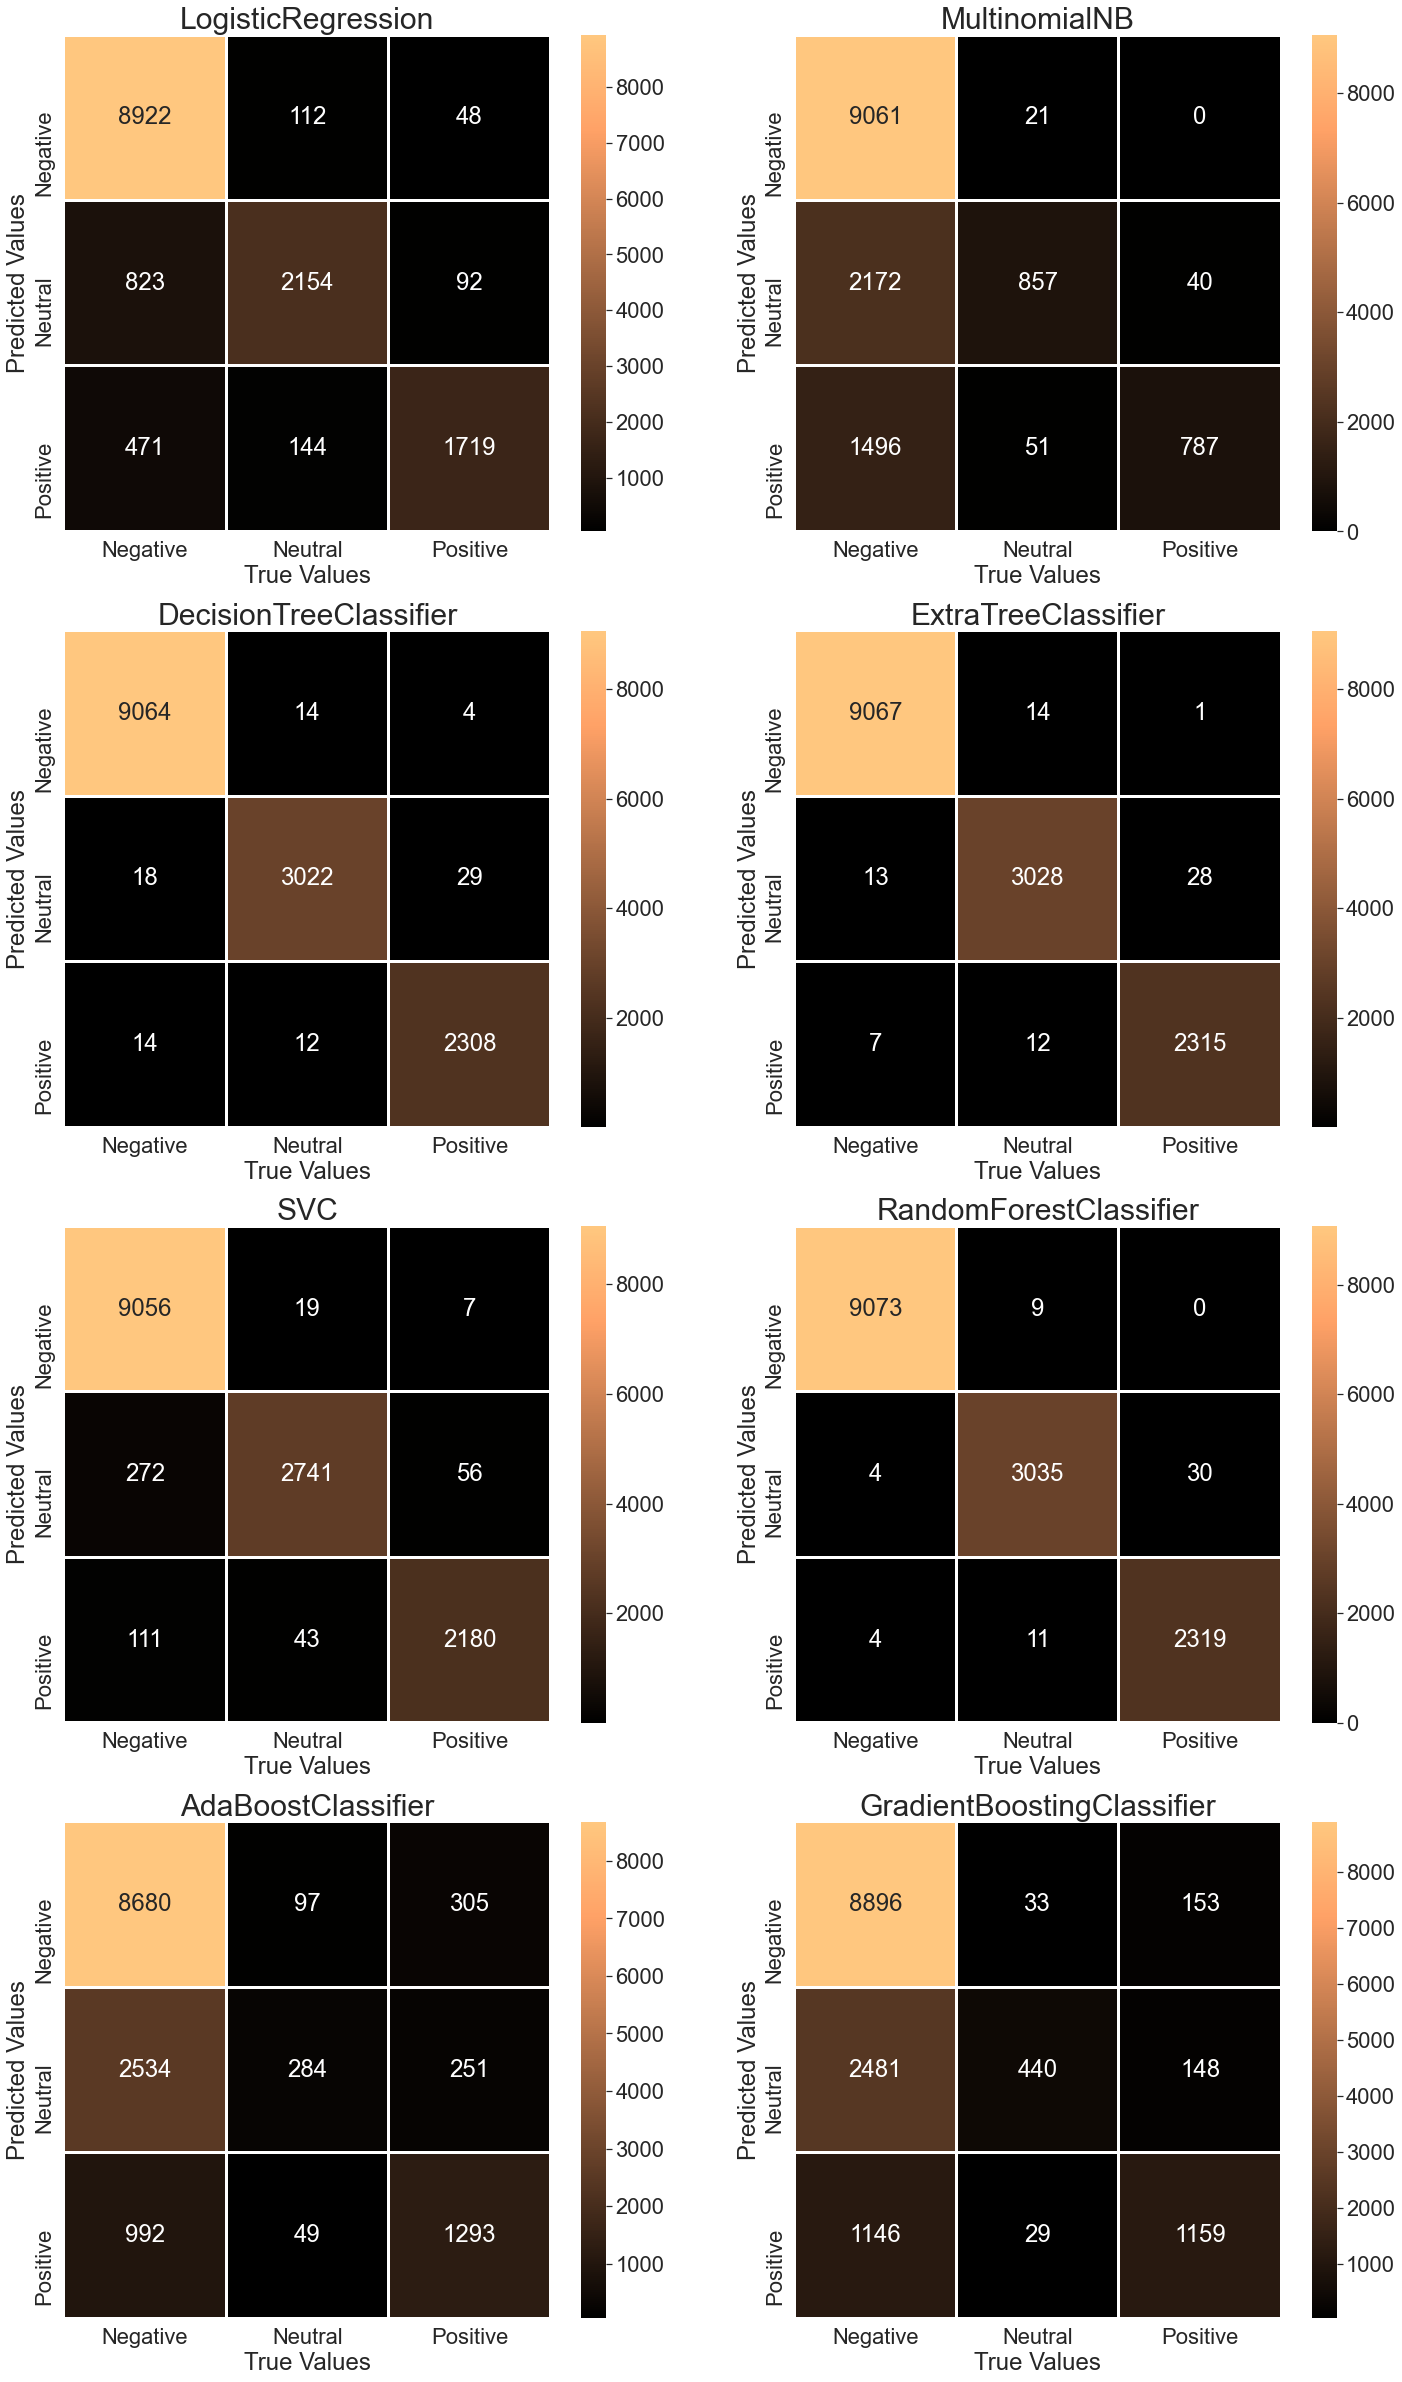

In [30]:
plt.figure(figsize=(24,42))
sb.set(font_scale=2)
for i,n in zip(range(1,9),names):
    plt.subplot(4,2,i)
    sb.heatmap(con_mat[n],annot=True,linecolor='white',linewidths=2,fmt='g',cmap='copper',xticklabels=['Negative','Neutral','Positive'],
              yticklabels=['Negative','Neutral','Positive'])
    plt.title(n,fontsize=30)
    plt.ylabel("Predicted Values")
    plt.xlabel("True Values")

#### COMPARING THE PERFORMANCES OF VARIOUS MODELS

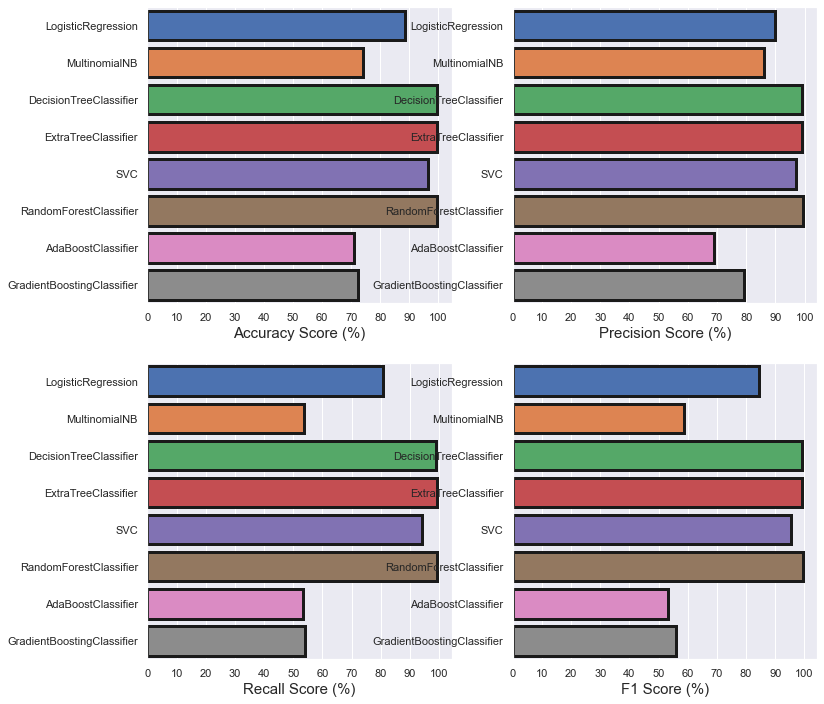

In [29]:
sb.set(font_scale=1)
plt.figure(figsize=(12,12))
for num,var in enumerate(scores.columns):
    plt.subplot(2,2,num+1)
    sb.barplot(x=scores[var],y=scores.index,saturation=5,edgecolor='k',linewidth=3)
    plt.xlabel(var+" Score (%)",fontsize=15)
    plt.xticks(np.arange(0,1.1,0.1),labels=np.arange(0,110,10))



### IT IS FOUND THAT RANDOM FOREST CLASSIFIER, DECISION TREE CLASSIFIER AND EXTRA TREE CLASSIFER GIVE THE BEST PERFORMANCE RESULTS
  